In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '466d3b82-c84a-4bdf-8812-c6acad384e14',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-09-26T15:42:40.770Z', 'error_code': 0, 'error_message': None, 'elapsed': 66, 'credit_count': 25, 'notice': None, 'total_count': 9815}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11722, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [52]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id               name symbol               slug  num_market_pairs  \
0         1            Bitcoin    BTC            bitcoin             11722   
1      1027           Ethereum    ETH           ethereum              9351   
2       825        Tether USDt   USDT             tether             98794   
3      1839                BNB    BNB                bnb              2246   
4      5426             Solana    SOL             solana               741   
...     ...                ...    ...                ...               ...   
4995  25125  IL CAPO OF CRYPTO   CAPO  il-capo-of-crypto                33   
4996  22698               Pine   PINE               pine                17   
4997  23307     Black Stallion     BS     black-stallion                 4   
4998  31299          Based USA    USA          based-usa                 3   
4999  32414       Parry Parrot  PARRY       parry-parrot                 5   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2023-05-09T16:00:09.000Z   
4996  2022-11-17T06:54:18.000Z   
4997  2023-02-25T19:26:48.000Z   
4998  2024-05-17T09:42:47.000Z   
4999  2024-07-25T21:00:37.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                                            [memes]  1.000000e+09   
4996                                                 []  2.000000e+08   
4997                                                 []  2.400000e+08   
4998                                                 []  9.620000e+08   
4999                                                 []  9.999999e+08   

      circulating_supply         total_supply  infinite_supply  platform  \
0           1.975924e+07             19759237            False       NaN   
1           1.203628e+08     120362772.033433             True       NaN   
2           1.192813e+11  121372683870.888687             True       NaN   
3           1.459333e+08     145933271.076178            False       NaN   
4           4.688419e+08     585384887.578381             True       NaN   
...                  ...                  ...              ...       ...   
4995        0.000000e+00           1000000000            False       NaN   
4996        0.000000e+00            200000000            False       NaN   
4997        0.000000e+00            240000000            False       NaN   
4998        0.000000e+00            961999996            False       NaN   
4999        0.000000e+00                    0            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                       901163964.0              63608.171515   
4996      4997                        21410933.0              66992.191118   
4997      4998                         8400000.0             583520.890635   
4998      4999                       962000000.0             390173.637074   
4999      5000 

In [36]:
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from requests import Session

In [56]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '466d3b82-c84a-4bdf-8812-c6acad384e14',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


In [62]:
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from time import sleep

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '466d3b82-c84a-4bdf-8812-c6acad384e14',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return None
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Admin\OneDrive\Desktop\My Data Analysis Projects\Python Course Alex\API.csv'):
        df.to_csv(r'C:\Users\Admin\OneDrive\Desktop\My Data Analysis Projects\Python Course Alex\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Admin\OneDrive\Desktop\My Data Analysis Projects\Python Course Alex\API.csv', mode='a', header=False)


In [64]:
import os
from time import time
from time import sleep

for i in range(50):
    api_runner()
    print('API ran successfully')
    sleep(60)
exit()

API ran successfully
API ran successfully
API ran successfully


KeyboardInterrupt: 

In [66]:
df4 = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\My Data Analysis Projects\Python Course Alex\API.csv")
df4

Unnamed: 0     id           name symbol                  slug  \
0            0      1        Bitcoin    BTC               bitcoin   
1            1   1027       Ethereum    ETH              ethereum   
2            2    825    Tether USDt   USDT                tether   
3            3   1839            BNB    BNB                   bnb   
4            4   5426         Solana    SOL                solana   
5            5   3408           USDC   USDC              usd-coin   
6            6     52            XRP    XRP                   xrp   
7            7     74       Dogecoin   DOGE              dogecoin   
8            8  11419        Toncoin    TON               toncoin   
9            9   2010        Cardano    ADA               cardano   
10          10   1958           TRON    TRX                  tron   
11          11   5805      Avalanche   AVAX             avalanche   
12          12   5994      Shiba Inu   SHIB             shiba-inu   
13          13   1975      Chainlink   LINK             chainlink   
14          14   6636       Polkadot    DOT          polkadot-new   
15          15   1831   Bitcoin Cash    BCH          bitcoin-cash   
16          16   6535  NEAR Protocol   NEAR         near-protocol   
17          17   3957   UNUS SED LEO    LEO          unus-sed-leo   
18          18   4943            Dai    DAI  multi-collateral-dai   
19          19      2       Litecoin    LTC              litecoin   
20           0      1        Bitcoin    BTC               bitcoin   
21           1   1027       Ethereum    ETH              ethereum   
22           2    825    Tether USDt   USDT                tether   
23           3   1839            BNB    BNB                   bnb   
24           4   5426         Solana    SOL                solana   
25           5   3408           USDC   USDC              usd-coin   
26           6     52            XRP    XRP                   xrp   
27           7     74       Dogecoin   DOGE              dogecoin   
28           8  11419        Toncoin    TON               toncoin   
29           9   2010        Cardano    ADA               cardano   
30          10   1958           TRON    TRX                  tron   
31          11   5805      Avalanche   AVAX             avalanche   
32          12   5994      Shiba Inu   SHIB             shiba-inu   
33          13   1975      Chainlink   LINK             chainlink   
34          14   6636       Polkadot    DOT          polkadot-new   
35          15   1831   Bitcoin Cash    BCH          bitcoin-cash   
36          16   6535  NEAR Protocol   NEAR         near-protocol   
37          17   3957   UNUS SED LEO    LEO          unus-sed-leo   
38          18   4943            Dai    DAI  multi-collateral-dai   
39          19      2       Litecoin    LTC              litecoin   
40           0      1        Bitcoin    BTC               bitcoin   
41           1   1027       Ethereum    ETH              ethereum   
42           2    825    Tether USDt   USDT                tether   
43           3   1839            BNB    BNB                   bnb   
44           4   5426         Solana    SOL                solana   
45           5   3408           USDC   USDC              usd-coin   
46           6     52            XRP    XRP                   xrp   
47           7     74       Dogecoin   DOGE              dogecoin   
48           8  11419        Toncoin    TON               toncoin   
49           9   2010        Cardano    ADA               cardano   
50          10   1958           TRON    TRX                  tron   
51          11   5805      Avalanche   AVAX             avalanche   
52          12   5994      Shiba Inu   SHIB             shiba-inu   
53          13   1975      Chainlink   LINK             chainlink   
54          14   6636       Polkadot    DOT          polkadot-new   
55          15   1831   Bitcoin Cash    BCH          bitcoin-cash   
56          16   6535  NEAR Protocol   NEAR         near-protocol   
57

In [48]:
#alternate option to concatenate in dataframe instead of importing it to csv

#df2 = pd.DataFrame()  # Empty DataFrame to collect data
#for i in range(50):
#    df2 = api_runner()
#    if df is not None:
#        df = pd.concat([df, df2], ignore_index=True)  # Use pd.concat instead of append
#        print('API ran successfully')
#    sleep(60)

API ran successfully
API ran successfully
API ran successfully
API ran successfully
API ran successfully
API ran successfully
API ran successfully
API ran successfully
API ran successfully
API ran successfully


KeyboardInterrupt: 

In [68]:
df

id           name symbol                  slug  num_market_pairs  \
0        1        Bitcoin    BTC               bitcoin             11722   
1     1027       Ethereum    ETH              ethereum              9351   
2      825    Tether USDt   USDT                tether             98795   
3     1839            BNB    BNB                   bnb              2246   
4     5426         Solana    SOL                solana               741   
5     3408           USDC   USDC              usd-coin             22203   
6       52            XRP    XRP                   xrp              1396   
7       74       Dogecoin   DOGE              dogecoin              1072   
8    11419        Toncoin    TON               toncoin               568   
9     2010        Cardano    ADA               cardano              1258   
10    1958           TRON    TRX                  tron              1039   
11    5805      Avalanche   AVAX             avalanche               783   
12    5994      Shiba Inu   SHIB             shiba-inu               881   
13    1975      Chainlink   LINK             chainlink              1849   
14    6636       Polkadot    DOT          polkadot-new               821   
15    1831   Bitcoin Cash    BCH          bitcoin-cash               929   
16    6535  NEAR Protocol   NEAR         near-protocol               451   
17    3957   UNUS SED LEO    LEO          unus-sed-leo                48   
18    4943            Dai    DAI  multi-collateral-dai              3378   
19       2       Litecoin    LTC              litecoin              1246   
20       1        Bitcoin    BTC               bitcoin             11722   
21    1027       Ethereum    ETH              ethereum              9351   
22     825    Tether USDt   USDT                tether             98795   
23    1839            BNB    BNB                   bnb              2246   
24    5426         Solana    SOL                solana               741   
25    3408           USDC   USDC              usd-coin             22203   
26      52            XRP    XRP                   xrp              1396   
27      74       Dogecoin   DOGE              dogecoin              1072   
28   11419        Toncoin    TON               toncoin               568   
29    2010        Cardano    ADA               cardano              1258   
30    1958           TRON    TRX                  tron              1039   
31    5805      Avalanche   AVAX             avalanche               783   
32    5994      Shiba Inu   SHIB             shiba-inu               881   
33    1975      Chainlink   LINK             chainlink              1849   
34    6636       Polkadot    DOT          polkadot-new               821   
35    1831   Bitcoin Cash    BCH          bitcoin-cash               929   
36    6535  NEAR Protocol   NEAR         near-protocol               451   
37    3957   UNUS SED LEO    LEO          unus-sed-leo                48   
38    4943            Dai    DAI  multi-collateral-dai              3378   
39       2       Litecoin    LTC              litecoin              1246   
40       1        Bitcoin    BTC               bitcoin             11722   
41    1027       Ethereum    ETH              ethereum              9351   
42     825    Tether USDt   USDT                tether             98795   
43    1839            BNB    BNB                   bnb              2246   
44    5426         Solana    SOL                solana               741   
45    3408           USDC   USDC              usd-coin             22203   
46      52            XRP    XRP                   xrp              1396   
47      74       Dogecoin   DOGE              dogecoin              1072   
48   11419        Toncoin    TON               toncoin               568   
49    2010        Cardano    ADA               cardano              1258   
50    1958           TRON    TRX                  tron              1039   
51    5805      Avalanche   AVAX             avalanche  

In [70]:
pd.set_option('display.float.format', lambda x: '%.5f'% x)

In [72]:
df

id           name symbol                  slug  num_market_pairs  \
0        1        Bitcoin    BTC               bitcoin             11722   
1     1027       Ethereum    ETH              ethereum              9351   
2      825    Tether USDt   USDT                tether             98795   
3     1839            BNB    BNB                   bnb              2246   
4     5426         Solana    SOL                solana               741   
5     3408           USDC   USDC              usd-coin             22203   
6       52            XRP    XRP                   xrp              1396   
7       74       Dogecoin   DOGE              dogecoin              1072   
8    11419        Toncoin    TON               toncoin               568   
9     2010        Cardano    ADA               cardano              1258   
10    1958           TRON    TRX                  tron              1039   
11    5805      Avalanche   AVAX             avalanche               783   
12    5994      Shiba Inu   SHIB             shiba-inu               881   
13    1975      Chainlink   LINK             chainlink              1849   
14    6636       Polkadot    DOT          polkadot-new               821   
15    1831   Bitcoin Cash    BCH          bitcoin-cash               929   
16    6535  NEAR Protocol   NEAR         near-protocol               451   
17    3957   UNUS SED LEO    LEO          unus-sed-leo                48   
18    4943            Dai    DAI  multi-collateral-dai              3378   
19       2       Litecoin    LTC              litecoin              1246   
20       1        Bitcoin    BTC               bitcoin             11722   
21    1027       Ethereum    ETH              ethereum              9351   
22     825    Tether USDt   USDT                tether             98795   
23    1839            BNB    BNB                   bnb              2246   
24    5426         Solana    SOL                solana               741   
25    3408           USDC   USDC              usd-coin             22203   
26      52            XRP    XRP                   xrp              1396   
27      74       Dogecoin   DOGE              dogecoin              1072   
28   11419        Toncoin    TON               toncoin               568   
29    2010        Cardano    ADA               cardano              1258   
30    1958           TRON    TRX                  tron              1039   
31    5805      Avalanche   AVAX             avalanche               783   
32    5994      Shiba Inu   SHIB             shiba-inu               881   
33    1975      Chainlink   LINK             chainlink              1849   
34    6636       Polkadot    DOT          polkadot-new               821   
35    1831   Bitcoin Cash    BCH          bitcoin-cash               929   
36    6535  NEAR Protocol   NEAR         near-protocol               451   
37    3957   UNUS SED LEO    LEO          unus-sed-leo                48   
38    4943            Dai    DAI  multi-collateral-dai              3378   
39       2       Litecoin    LTC              litecoin              1246   
40       1        Bitcoin    BTC               bitcoin             11722   
41    1027       Ethereum    ETH              ethereum              9351   
42     825    Tether USDt   USDT                tether             98795   
43    1839            BNB    BNB                   bnb              2246   
44    5426         Solana    SOL                solana               741   
45    3408           USDC   USDC              usd-coin             22203   
46      52            XRP    XRP                   xrp              1396   
47      74       Dogecoin   DOGE              dogecoin              1072   
48   11419        Toncoin    TON               toncoin               568   
49    2010        Cardano    ADA               cardano              1258   
50    1958           TRON    TRX                  tron              1039   
51    5805      Avalanche   AVAX             avalanche  

In [76]:
df5 = df.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df5

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                       
Bitcoin                            1.17193                       2.81381   
Ethereum                           1.14944                       1.96160   
Tether USDt                        0.01034                       0.01741   
BNB                                1.31134                       1.45384   
Solana                             2.09568                       4.52359   
USDC                               0.00628                       0.00411   
XRP                                0.50446                       1.13985   
Dogecoin                           1.51585                       7.67910   
Toncoin                            1.16512                       3.40357   
Cardano                            1.13106                       4.55751   
TRON                               0.23091                       1.55234   
Avalanche                          1.80577                       5.96831   
Shiba Inu                          4.00668                      16.42824   
Chainlink                          1.67783                       2.10578   
Polkadot                           0.57070                       2.35550   
Bitcoin Cash                       0.83085                       2.16245   
NEAR Protocol                      1.43675                      11.49751   
UNUS SED LEO                       0.46081                       1.06497   
Dai                               -0.00737                       0.01243   
Litecoin                           0.92131                       1.12899   

               quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                       
Bitcoin                            3.36362                       5.90706   
Ethereum                           8.34937                       3.07865   
Tether USDt                        0.00469                       0.02342   
BNB                                6.24814                       9.23529   
Solana                             9.86232                       2.48849   
USDC                               0.00264                       0.00060   
XRP                                0.91533                      -0.28786   
Dogecoin                          11.41063                      13.23438   
Toncoin                            1.64321                       7.78397   
Cardano                           13.55566                      10.88655   
TRON                               0.90030                      -5.53745   
Avalanche                         10.79896                      15.69245   
Shiba Inu                         24.67634                      25.22872   
Chainlink                         12.32809                      10.02092   
Polkadot                          12.65622                       7.14376   
Bitcoin Cash                       3.65814                       5.24734   
NEAR Protocol                     29.73803                      26.20148   
UNUS SED LEO                       2.52651                      -0.35689   
Dai                               -0.01933                       0.02920   
Litecoin                           4.16316                       8.17669   

               quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                       
Bitcoin                            -3.41479                       7.42854  
Ethereum                          -19.00668                     -22.13580  
Tether USDt                         0.02128                       0.20605  
BNB                                 3.72559                       5.45547  
Solana                            -14.59777                      10.02116  
USDC                                0.00290                       0.01644  
XRP                                -1.77197                  

In [86]:
df6 = df5.stack().to_frame(name='values')
df6

values
name                                                
Bitcoin       quote.USD.percent_change_1h    1.17193
              quote.USD.percent_change_24h   2.81381
              quote.USD.percent_change_7d    3.36362
              quote.USD.percent_change_30d   5.90706
              quote.USD.percent_change_60d  -3.41479
              quote.USD.percent_change_90d   7.42854
Ethereum      quote.USD.percent_change_1h    1.14944
              quote.USD.percent_change_24h   1.96160
              quote.USD.percent_change_7d    8.34937
              quote.USD.percent_change_30d   3.07865
              quote.USD.percent_change_60d -19.00668
              quote.USD.percent_change_90d -22.13580
Tether USDt   quote.USD.percent_change_1h    0.01034
              quote.USD.percent_change_24h   0.01741
              quote.USD.percent_change_7d    0.00469
              quote.USD.percent_change_30d   0.02342
              quote.USD.percent_change_60d   0.02128
              quote.USD.percent_change_90d   0.20605
BNB           quote.USD.percent_change_1h    1.31134
              quote.USD.percent_change_24h   1.45384
              quote.USD.percent_change_7d    6.24814
              quote.USD.percent_change_30d   9.23529
              quote.USD.percent_change_60d   3.72559
              quote.USD.percent_change_90d   5.45547
Solana        quote.USD.percent_change_1h    2.09568
              quote.USD.percent_change_24h   4.52359
              quote.USD.percent_change_7d    9.86232
              quote.USD.percent_change_30d   2.48849
              quote.USD.percent_change_60d -14.59777
              quote.USD.percent_change_90d  10.02116
USDC          quote.USD.percent_change_1h    0.00628
              quote.USD.percent_change_24h   0.00411
              quote.USD.percent_change_7d    0.00264
              quote.USD.percent_change_30d   0.00060
              quote.USD.percent_change_60d   0.00290
              quote.USD.percent_change_90d   0.01644
XRP           quote.USD.percent_change_1h    0.50446
              quote.USD.percent_change_24h   1.13985
              quote.USD.percent_change_7d    0.91533
              quote.USD.percent_change_30d  -0.28786
              quote.USD.percent_change_60d  -1.77197
              quote.USD.percent_change_90d  24.74806
Dogecoin      quote.USD.percent_change_1h    1.51585
              quote.USD.percent_change_24h   7.67910
              quote.USD.percent_change_7d   11.41063
              quote.USD.percent_change_30d  13.23438
              quote.USD.percent_change_60d  -9.36742
              quote.USD.percent_change_90d  -6.60403
Toncoin       quote.USD.percent_change_1h    1.16512
              quote.USD.percent_change_24h   3.40357
              quote.USD.percent_change_7d    1.64321
              quote.USD.percent_change_30d   7.78397
              quote.USD.percent_change_60d -10.53363
              quote.USD.percent_change_90d -22.72957
Cardano       quote.USD.percent_change_1h    1.13106
              quote.USD.percent_change_24h   4.55751
              quote.USD.percent_change_7d   13.55566
              quote.USD.percent_change_30d  10.88655
              quote.USD.percent_change_60d  -1.65867
              quote.USD.percent_change_90d   2.55080
TRON          quote.USD.percent_change_1h    0.23091
              quote.USD.percent_change_24h   1.55234
              quote.USD.percent_change_7d    0.90030
              quote.USD.percent_change_30d  -5.53745
              quote.USD.percent_change_60d  10.44583
              quote.USD.percent_change_90d  24.37439
Avalanche     quote.USD.percent_change_1h    1.80577
              quote.USD.percent_change_24h   5.96831
              quote.USD.percent_change_7d   10.79896
              quote.USD.percent_change_30d  15.69245
              quote.USD.percent_change_60d   7.13347
              quote.USD.percent_change_90d   3.15492
Shiba Inu     quote.USD.percent_change_1h    4.00668
              quote.USD.percent_change_24h  16.42824
              quot

In [89]:
df6.count()

values    120
dtype: int64

In [101]:
index = pd.Index(range(120))
df7 = df6.reset_index()
df7

name                       level_1    values
0          Bitcoin   quote.USD.percent_change_1h   1.17193
1          Bitcoin  quote.USD.percent_change_24h   2.81381
2          Bitcoin   quote.USD.percent_change_7d   3.36362
3          Bitcoin  quote.USD.percent_change_30d   5.90706
4          Bitcoin  quote.USD.percent_change_60d  -3.41479
5          Bitcoin  quote.USD.percent_change_90d   7.42854
6         Ethereum   quote.USD.percent_change_1h   1.14944
7         Ethereum  quote.USD.percent_change_24h   1.96160
8         Ethereum   quote.USD.percent_change_7d   8.34937
9         Ethereum  quote.USD.percent_change_30d   3.07865
10        Ethereum  quote.USD.percent_change_60d -19.00668
11        Ethereum  quote.USD.percent_change_90d -22.13580
12     Tether USDt   quote.USD.percent_change_1h   0.01034
13     Tether USDt  quote.USD.percent_change_24h   0.01741
14     Tether USDt   quote.USD.percent_change_7d   0.00469
15     Tether USDt  quote.USD.percent_change_30d   0.02342
16     Tether USDt  quote.USD.percent_change_60d   0.02128
17     Tether USDt  quote.USD.percent_change_90d   0.20605
18             BNB   quote.USD.percent_change_1h   1.31134
19             BNB  quote.USD.percent_change_24h   1.45384
20             BNB   quote.USD.percent_change_7d   6.24814
21             BNB  quote.USD.percent_change_30d   9.23529
22             BNB  quote.USD.percent_change_60d   3.72559
23             BNB  quote.USD.percent_change_90d   5.45547
24          Solana   quote.USD.percent_change_1h   2.09568
25          Solana  quote.USD.percent_change_24h   4.52359
26          Solana   quote.USD.percent_change_7d   9.86232
27          Solana  quote.USD.percent_change_30d   2.48849
28          Solana  quote.USD.percent_change_60d -14.59777
29          Solana  quote.USD.percent_change_90d  10.02116
30            USDC   quote.USD.percent_change_1h   0.00628
31            USDC  quote.USD.percent_change_24h   0.00411
32            USDC   quote.USD.percent_change_7d   0.00264
33            USDC  quote.USD.percent_change_30d   0.00060
34            USDC  quote.USD.percent_change_60d   0.00290
35            USDC  quote.USD.percent_change_90d   0.01644
36             XRP   quote.USD.percent_change_1h   0.50446
37             XRP  quote.USD.percent_change_24h   1.13985
38             XRP   quote.USD.percent_change_7d   0.91533
39             XRP  quote.USD.percent_change_30d  -0.28786
40             XRP  quote.USD.percent_change_60d  -1.77197
41             XRP  quote.USD.percent_change_90d  24.74806
42        Dogecoin   quote.USD.percent_change_1h   1.51585
43        Dogecoin  quote.USD.percent_change_24h   7.67910
44        Dogecoin   quote.USD.percent_change_7d  11.41063
45        Dogecoin  quote.USD.percent_change_30d  13.23438
46        Dogecoin  quote.USD.percent_change_60d  -9.36742
47        Dogecoin  quote.USD.percent_change_90d  -6.60403
48         Toncoin   quote.USD.percent_change_1h   1.16512
49         Toncoin  quote.USD.percent_change_24h   3.40357
50         Toncoin   quote.USD.percent_change_7d   1.64321
51         Toncoin  quote.USD.percent_change_30d   7.78397
52         Toncoin  quote.USD.percent_change_60d -10.53363
53         Toncoin  quote.USD.percent_change_90d -22.72957
54         Cardano   quote.USD.percent_change_1h   1.13106
55         Cardano  quote.USD.percent_change_24h   4.55751
56         Cardano   quote.USD.percent_change_7d  13.55566
57         Cardano  quote.USD.percent_change_30d  10.88655
58         Cardano  quote.USD.percent_change_60d  -1.65867
59         Cardano  quote.USD.percent_change_90d   2.55080
60            TRON   quote.USD.percent_change_1h   0.23091
61            TRON  quote.USD.percent_change_24h   1.55234
62            TRON   quote.USD.percent_change_7d   0.90030
63            TRON  quote.USD.percent_change_30d  -5.53745
64            TRON  quote.USD.percent_change_60d  10.44583
65            TRON  quote.USD.percent_change_90d  24.37439
66       Avalanche   quote.USD.percent_change_1h   1.80577
67

In [105]:
df8 = df7.rename(columns = {'level_1':'Percent_change'})
df8

name                Percent_change    values
0          Bitcoin   quote.USD.percent_change_1h   1.17193
1          Bitcoin  quote.USD.percent_change_24h   2.81381
2          Bitcoin   quote.USD.percent_change_7d   3.36362
3          Bitcoin  quote.USD.percent_change_30d   5.90706
4          Bitcoin  quote.USD.percent_change_60d  -3.41479
5          Bitcoin  quote.USD.percent_change_90d   7.42854
6         Ethereum   quote.USD.percent_change_1h   1.14944
7         Ethereum  quote.USD.percent_change_24h   1.96160
8         Ethereum   quote.USD.percent_change_7d   8.34937
9         Ethereum  quote.USD.percent_change_30d   3.07865
10        Ethereum  quote.USD.percent_change_60d -19.00668
11        Ethereum  quote.USD.percent_change_90d -22.13580
12     Tether USDt   quote.USD.percent_change_1h   0.01034
13     Tether USDt  quote.USD.percent_change_24h   0.01741
14     Tether USDt   quote.USD.percent_change_7d   0.00469
15     Tether USDt  quote.USD.percent_change_30d   0.02342
16     Tether USDt  quote.USD.percent_change_60d   0.02128
17     Tether USDt  quote.USD.percent_change_90d   0.20605
18             BNB   quote.USD.percent_change_1h   1.31134
19             BNB  quote.USD.percent_change_24h   1.45384
20             BNB   quote.USD.percent_change_7d   6.24814
21             BNB  quote.USD.percent_change_30d   9.23529
22             BNB  quote.USD.percent_change_60d   3.72559
23             BNB  quote.USD.percent_change_90d   5.45547
24          Solana   quote.USD.percent_change_1h   2.09568
25          Solana  quote.USD.percent_change_24h   4.52359
26          Solana   quote.USD.percent_change_7d   9.86232
27          Solana  quote.USD.percent_change_30d   2.48849
28          Solana  quote.USD.percent_change_60d -14.59777
29          Solana  quote.USD.percent_change_90d  10.02116
30            USDC   quote.USD.percent_change_1h   0.00628
31            USDC  quote.USD.percent_change_24h   0.00411
32            USDC   quote.USD.percent_change_7d   0.00264
33            USDC  quote.USD.percent_change_30d   0.00060
34            USDC  quote.USD.percent_change_60d   0.00290
35            USDC  quote.USD.percent_change_90d   0.01644
36             XRP   quote.USD.percent_change_1h   0.50446
37             XRP  quote.USD.percent_change_24h   1.13985
38             XRP   quote.USD.percent_change_7d   0.91533
39             XRP  quote.USD.percent_change_30d  -0.28786
40             XRP  quote.USD.percent_change_60d  -1.77197
41             XRP  quote.USD.percent_change_90d  24.74806
42        Dogecoin   quote.USD.percent_change_1h   1.51585
43        Dogecoin  quote.USD.percent_change_24h   7.67910
44        Dogecoin   quote.USD.percent_change_7d  11.41063
45        Dogecoin  quote.USD.percent_change_30d  13.23438
46        Dogecoin  quote.USD.percent_change_60d  -9.36742
47        Dogecoin  quote.USD.percent_change_90d  -6.60403
48         Toncoin   quote.USD.percent_change_1h   1.16512
49         Toncoin  quote.USD.percent_change_24h   3.40357
50         Toncoin   quote.USD.percent_change_7d   1.64321
51         Toncoin  quote.USD.percent_change_30d   7.78397
52         Toncoin  quote.USD.percent_change_60d -10.53363
53         Toncoin  quote.USD.percent_change_90d -22.72957
54         Cardano   quote.USD.percent_change_1h   1.13106
55         Cardano  quote.USD.percent_change_24h   4.55751
56         Cardano   quote.USD.percent_change_7d  13.55566
57         Cardano  quote.USD.percent_change_30d  10.88655
58         Cardano  quote.USD.percent_change_60d  -1.65867
59         Cardano  quote.USD.percent_change_90d   2.55080
60            TRON   quote.USD.percent_change_1h   0.23091
61            TRON  quote.USD.percent_change_24h   1.55234
62            TRON   quote.USD.percent_change_7d   0.90030
63            TRON  quote.USD.percent_change_30d  -5.53745
64            TRON  quote.USD.percent_change_60d  10.44583
65            TRON  quote.USD.percent_change_90d  24.37439
66       Avalanche   quote.USD.percent_change_1h   1.80577
67

In [115]:
df8['Percent_change'] = df8['Percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

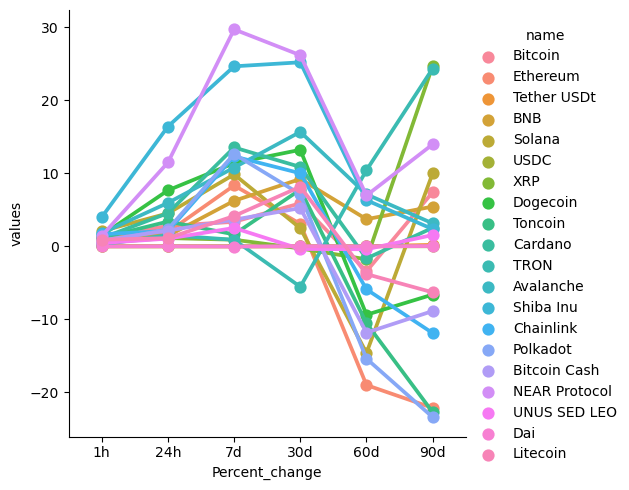

In [121]:
sns.catplot(x='Percent_change',y ='values', hue='name',data = df8, kind='point')

In [149]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Dogecoin'")
df9

name  quote.USD.price                  timestamp
7    Dogecoin          0.11668 2024-09-26 21:36:23.562754
27   Dogecoin          0.11668 2024-09-26 21:37:24.492092
47   Dogecoin          0.11686 2024-09-26 21:38:25.463530
67   Dogecoin          0.11715 2024-09-26 21:39:26.362421
87   Dogecoin          0.11710 2024-09-26 21:40:27.301682
107  Dogecoin          0.11779 2024-09-26 21:41:28.275634
127  Dogecoin          0.11789 2024-09-26 21:42:29.267183
147  Dogecoin          0.11789 2024-09-26 21:43:30.232393
167  Dogecoin          0.11815 2024-09-26 21:44:31.192288
187  Dogecoin          0.11820 2024-09-26 21:45:32.110435

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

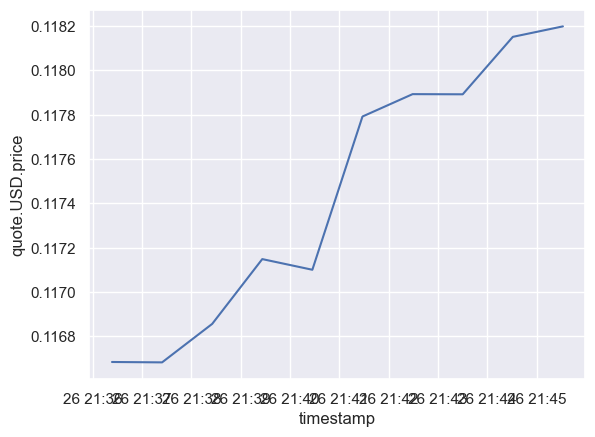

In [151]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)